In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import kagglehub

import os

/home/barni/projects/kaggle-playground/venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [14]:
destination_dir = os.path.join("datasets")


if not os.path.exists(destination_dir) or not os.listdir(destination_dir):
    print(f"Dataset not found locally. Downloading to '{destination_dir}'...")

    path = kagglehub.dataset_download("nicolacarrassi/ava-aesthetic-visual-assessment")
    
    print("Download complete.")
else:
    print(f"Dataset already exists at '{destination_dir}'. Skipping download.")
    path = os.path.abspath(destination_dir)

print("Path to dataset files",path)

base_path = path + ("/nicolacarrassi/ava-aesthetic-visual-assessment/versions/1")
ava_path = path + ("/nicolacarrassi/ava-aesthetic-visual-assessment/versions/1/AVA_Files")

metadata_file_path = os.path.join(ava_path, "AVA.txt")
tags_file_path = os.path.join(ava_path, "tags.txt")
challenges_file_path = os.path.join(ava_path, "challenges.txt")

Dataset already exists at 'datasets'. Skipping download.
Path to dataset files /home/barni/projects/kaggle-playground/datasets


In [52]:
column_names = ['ImageId','Vote1','Vote2','Vote3','Vote4','Vote5','Vote6','Vote7','Vote8','Vote9','Vote10','tag1','tag2','challenge']
columns_to_use = list(range(1, 15))
df_base = pd.read_csv(metadata_file_path,header=None,sep=r'\s+',usecols=columns_to_use,names=column_names)

df_base.head()

,ImageId,Vote1,Vote2,Vote3,Vote4,Vote5,Vote6,Vote7,Vote8,Vote9,Vote10,tag1,tag2,challenge
0,953619,0,1,5,17,38,36,15,6,5,1,1,22,1396
1,953958,10,7,15,26,26,21,10,8,1,2,1,21,1396
2,954184,0,0,4,8,41,56,10,3,4,0,0,0,1396
3,954113,0,1,4,6,48,37,23,5,2,2,15,21,1396
4,953980,0,3,6,15,57,39,6,1,1,1,22,38,1396


In [4]:
print("\n--- Missing Values Check ---")
print(df_base.isnull().sum())


--- Missing Values Check ---
ImageId      0
Vote1        0
Vote2        0
Vote3        0
Vote4        0
Vote5        0
Vote6        0
Vote7        0
Vote8        0
Vote9        0
Vote10       0
tag1         0
tag2         0
challenge    0
dtype: int64


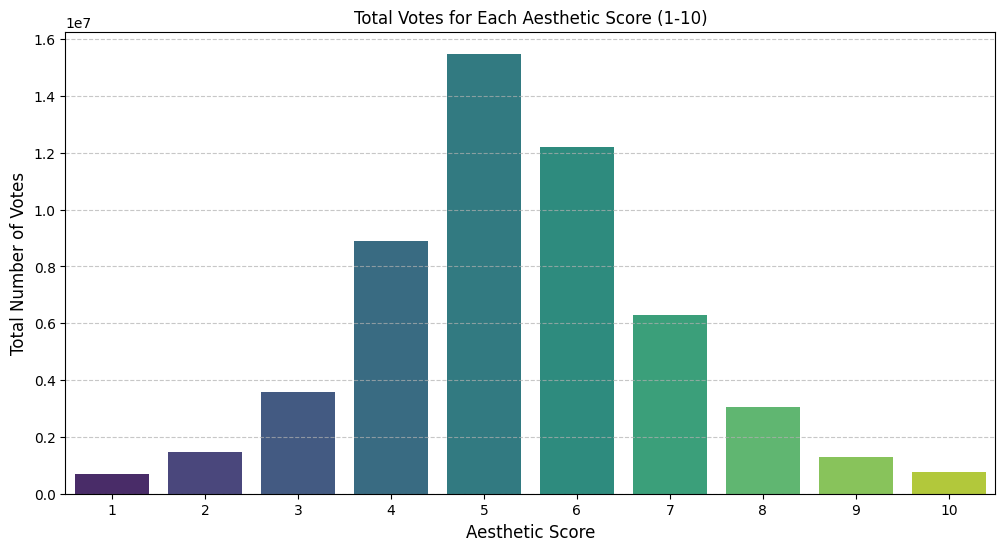

In [26]:
score_columns = ['Vote1','Vote2','Vote3','Vote4','Vote5','Vote6','Vote7','Vote8','Vote9','Vote10']

total_votes_per_score = df_base[score_columns].sum()

plt.figure(figsize=(12,6))
sns.barplot(x=total_votes_per_score.index, y=total_votes_per_score.values,palette='viridis', hue=total_votes_per_score.index, legend=False)

plt.title('Total Votes for Each Aesthetic Score (1-10)')
plt.xlabel('Aesthetic Score', fontsize=12)
plt.ylabel('Total Number of Votes', fontsize=12)
plt.xticks(ticks=range(10), labels=range(1,11))
plt.grid(axis='y',linestyle='--', alpha=0.7)
plt.show()

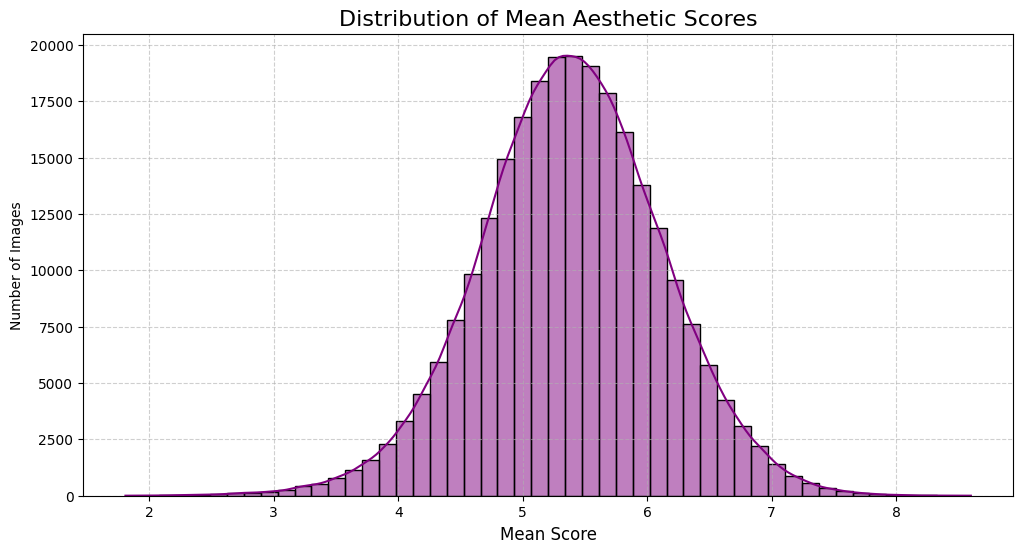

In [7]:
df_base['total_votes'] = df_base[score_columns].sum(axis=1)
weighted_sum = sum(df_base[f'Vote{i}'] * i for i in range(1,11))
df_base['mean_score'] = weighted_sum / df_base['total_votes']

plt.figure(figsize=(12,6))
sns.histplot(df_base['mean_score'], bins=50, kde=True, color='purple')

plt.title('Distribution of Mean Aesthetic Scores', fontsize=16)
plt.xlabel('Mean Score', fontsize=12)
plt.ylabel('Number of Images')
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.show()

In [53]:
column_names = ['tag_id','name']
columns_to_use = list(range(0, 2))
df_tags = pd.read_csv(tags_file_path,header=None,sep=r'\s+',usecols=columns_to_use,names=column_names)

df_tags.head()

,tag_id,name
0,1,Abstract
1,24,Action
2,31,Advertisement
3,66,Analog
4,19,Animals


In [54]:
column_names = ['challenge_id','name']
columns_to_use = list(range(0, 2))
df_challenges = pd.read_csv(challenges_file_path,header=None,sep=r'\s+',usecols=columns_to_use,names=column_names)

df_challenges.head()

,challenge_id,name
0,1396,100_Meters
1,1004,100_Years_Old
2,1329,100_Years_Old_II
3,608,12_Days_Of_Christmas
4,311,1970s


In [55]:
tag_map = df_tags.set_index('tag_id')['name']
challenge_map = df_challenges.set_index('challenge_id')['name']

df_base['tag1'] = df_base['tag1'].map(tag_map)
df_base['tag2'] = df_base['tag2'].map(tag_map)

df_base['challenge'] = df_base['challenge'].map(challenge_map)
df_base = df_base.fillna('')
df_base.head()

,ImageId,Vote1,Vote2,Vote3,Vote4,Vote5,Vote6,Vote7,Vote8,Vote9,Vote10,tag1,tag2,challenge
0,953619,0,1,5,17,38,36,15,6,5,1,Abstract,Macro,100_Meters
1,953958,10,7,15,26,26,21,10,8,1,2,Abstract,Black,100_Meters
2,954184,0,0,4,8,41,56,10,3,4,0,,,100_Meters
3,954113,0,1,4,6,48,37,23,5,2,2,Nature,Black,100_Meters
4,953980,0,3,6,15,57,39,6,1,1,1,Macro,Floral,100_Meters
